# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../datasets/diamonds/diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70


## Data cleaning

First things first, we want to look for and eventually replace missing/null values and noisy data.

In [2]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


The dataset does not contain any null values, so all the rows contains a value for each feature.

In order to start looking for noisy data and outliers, we generate some descriptive statistics, summarizing the central tendency, dispersion and shape of the data distribution.

In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


Here, by looking at the minimum registered values, we can already note that the price and the absolute dimension measurements (x, y and z) contains some invalid samples, having:
- -1 as the minimum price for a diamond
- 0 as the minimum measurement of x, y and z

In [4]:
negative_prices = df[df['price'] < 0]
negative_prices

,carat,cut,color,clarity,depth,table,price,x,y,z
331,1.00,Good,F,SI1,64.1,60.0,-1,6.25,6.19,3.99
2121,0.34,Ideal,E,VS2,59.8,56.0,-1,4.55,4.54,2.72
2484,1.75,Ideal,J,SI1,63.3,59.0,-1,7.63,7.57,4.81
2933,1.51,Ideal,H,VS2,62.5,55.0,-1,7.29,7.34,4.57
3155,0.31,Ideal,G,VS2,61.7,57.0,-1,4.33,4.36,2.68
3317,1.02,Premium,D,VS2,59.8,61.0,-1,6.61,6.54,3.93
3445,0.30,Premium,H,SI1,59.3,59.0,-1,4.38,4.36,2.59
3904,0.90,Very Good,G,SI2,64.2,56.0,-1,6.04,6.11,3.90
3980,0.41,Very Good,H,VS2,63.4,58.0,-1,4.77,4.66,2.99
4188,0.79,Ideal,H,VVS1,62.0,56.0,-1,5.92,5.96,3.68


In [5]:
negative_dimensions = df[(df['x'] <= 0) | (df['y'] <= 0) | (df['z'] <= 0)]
negative_dimensions

,carat,cut,color,clarity,depth,table,price,x,y,z
4321,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0


Since those values do not make sense we do not want to use them to train or test any model, so we can safely drop the corresponding rows and remove these isolated outliers.

In [6]:
df = df.drop(negative_prices.index)
df = df.drop(negative_dimensions.index)
df.describe()

,carat,depth,table,price,x,y,z
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,0.794117,61.710844,57.446242,3930.581880,5.726232,5.728821,3.533678
std,0.467981,1.445563,2.259752,3970.923311,1.116257,1.109167,0.688437
min,0.230000,44.000000,51.600000,351.000000,3.860000,3.840000,1.410000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5376.000000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


## Feature engineering

Let's now go a bit deeper into the analysis by visualizing the data distributions.

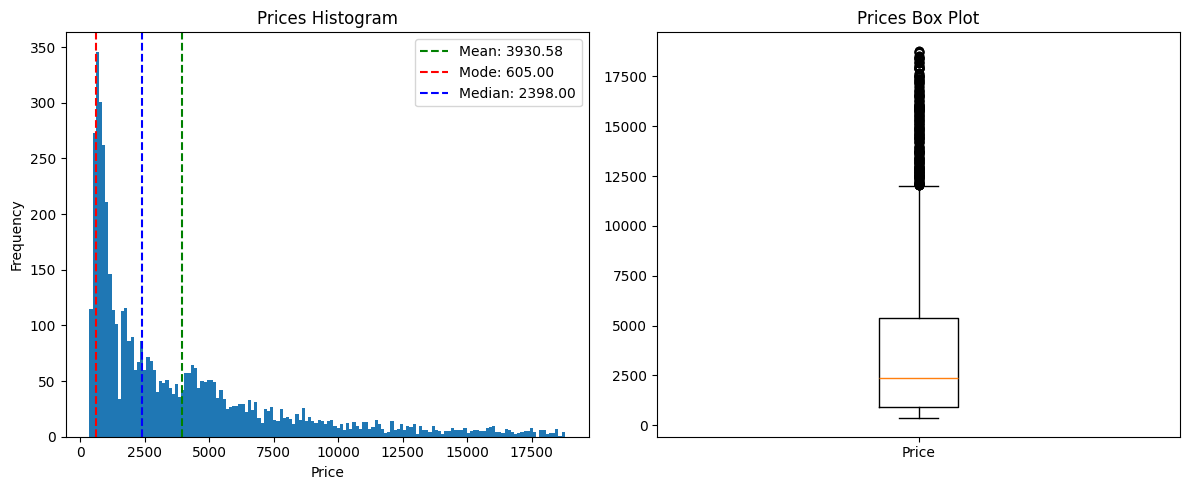

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

price_mean = df['price'].mean()
price_mode = df['price'].mode().values[0]
price_median = df['price'].median()

axes[0].hist(df['price'], bins=150)
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Prices Histogram')
axes[0].axvline(price_mean, linestyle='dashed', color='g', label=f"Mean: {price_mean:.2f}")
axes[0].axvline(price_mode, linestyle='dashed', color='r', label=f"Mode: {price_mode:.2f}")
axes[0].axvline(price_median, linestyle='dashed', color='b', label=f"Median: {price_median:.2f}")
axes[0].legend()

axes[1].boxplot(df['price'])
axes[1].set_xticks([1], ['Price'])
axes[1].set_title('Prices Box Plot')

plt.tight_layout()
plt.show()

Diamond prices seem to follow a long tailed distribution, with most of the diamonds clustered on the left with low prices and few diamonds with very high prices.

With a potential threshold for outliers set around 12.500 as shown in the boxplot on the right.

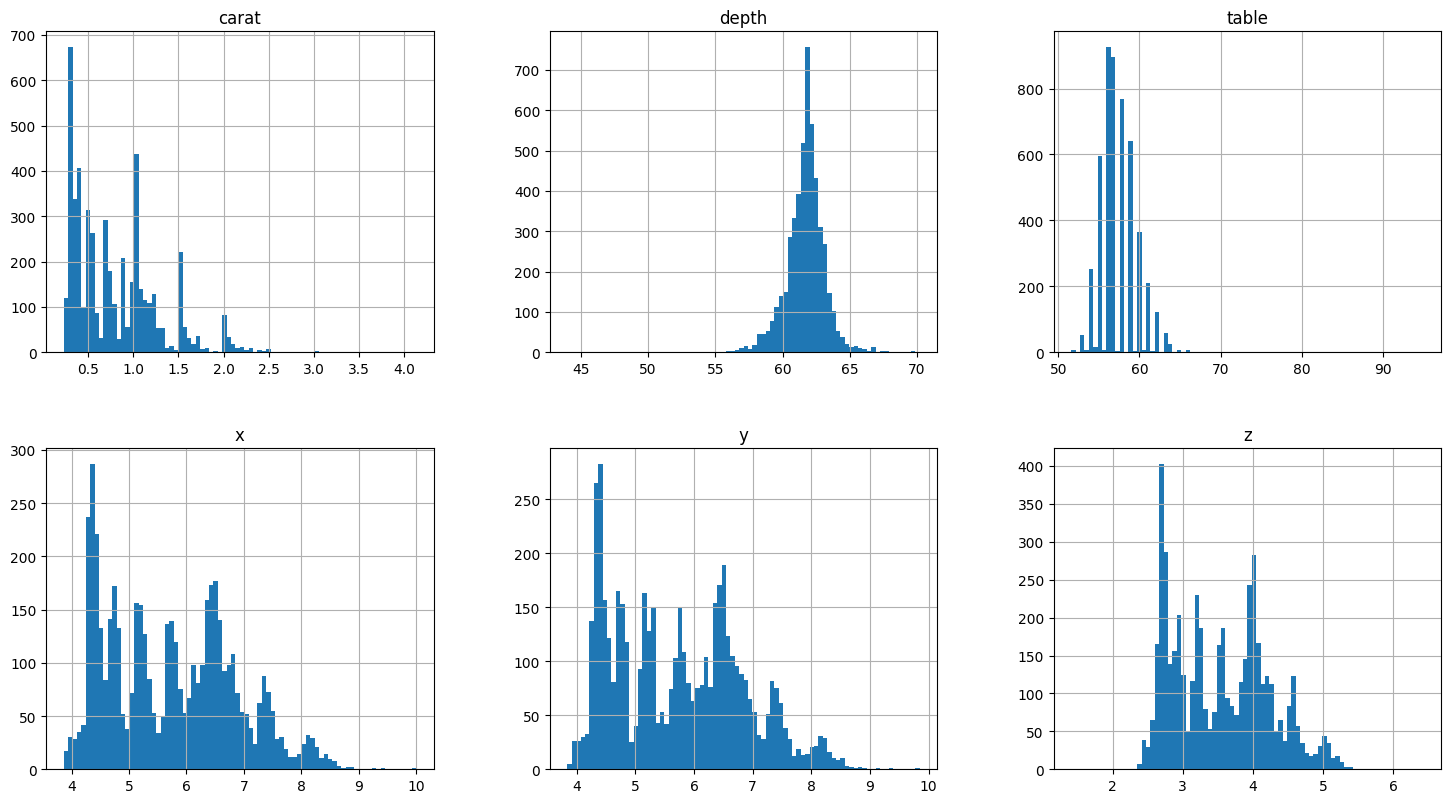

In [8]:
df.drop('price', axis=1).hist(figsize=(18, 15), layout=(3, 3), bins=80)
plt.show()

Depth and table follow gaussian distributions with some outliers, as also shown in the boxplots below. 

Carats and dimensions (x, y, and z) follow similar distributions, approximately also sharing some peaks together with the prices distribution.

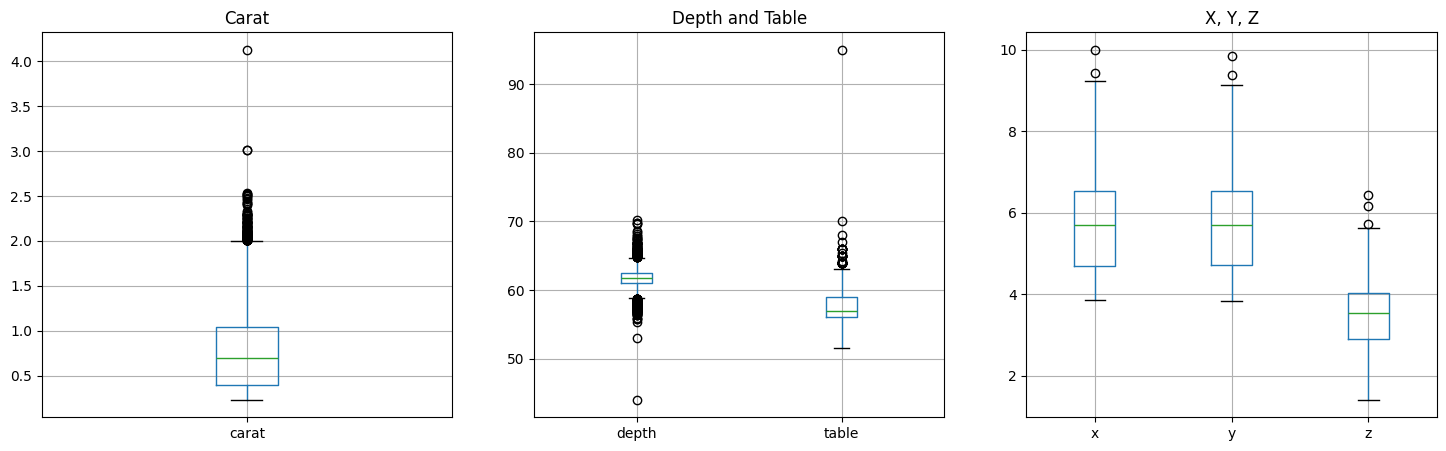

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

df.boxplot(['carat'], ax=axes[0])
axes[0].set_title('Carat')

df.boxplot(['depth', 'table'], ax=axes[1])
axes[1].set_title('Depth and Table')

df.boxplot(['x', 'y' ,'z'], ax=axes[2])
axes[2].set_title('X, Y, Z')

plt.show()

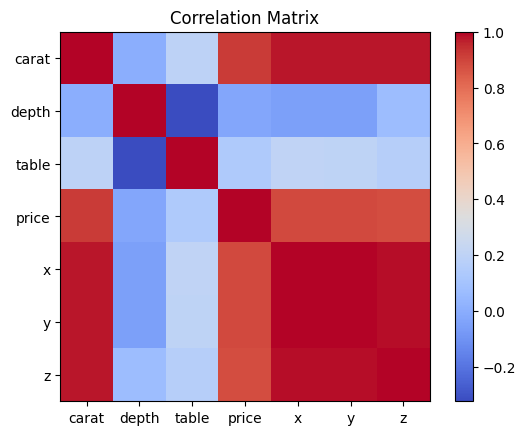

In [10]:
import matplotlib.pyplot as plt

corr_matrix = df.select_dtypes(exclude=['object']).corr()

plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix above confirms the high correlation between the price of a diamond, its carat value and its dimensions.

### Categorical features encoding

Before proceeding with further the model selection, we want to encode the categorical features (variables in the dataset that contain string values) as numerical values, so to be able to feed them into any Machine Learning model.

Since the categorical features we are dealing with, i.e. **color**, **cut** and **clarity** of the diamond, all have a pre-defined natural order, we want to encode this information as well (which may be valuable for a ML model), hence we use _Ordinal Encoding_.

In [11]:
cut_unique_values = df['cut'].unique()
color_unique_values = df['color'].unique()
clarity_unique_values = df['clarity'].unique()

print("Unique values of 'cut' column: \t\t", cut_unique_values)
print("Unique values of 'color' column: \t", color_unique_values)
print("Unique values of 'clarity' column: \t", clarity_unique_values)

Unique values of 'cut' column: 		 ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Unique values of 'color' column: 	 ['H' 'I' 'F' 'G' 'E' 'D' 'J']
Unique values of 'clarity' column: 	 ['SI2' 'SI1' 'VS2' 'IF' 'VVS2' 'VS1' 'I1' 'VVS1']


We know that the color grading scale has all letters from D to Z as possible values, but unique values of the 'color' column are only a subset of them.
Since new unseen data may also contain the others, we want to correctly encode all of them.

Moreover, since we already know the natural order for all categorical features from the description of the dataset, we can hardcode the order before mapping them to numeric values.

N.B. we reverse the scales because we want them orderd from worst to best

In [12]:
COLOR_GRADING_SCALE = tuple(reversed(['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']))
CUT_GRADE_SCALE = tuple(reversed(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']))
CLARITY_SCALE = tuple(reversed(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']))

We can embed the natural order of the categorical features in the original data for later use.

In [13]:
df['cut'] = pd.Categorical(df['cut'], CUT_GRADE_SCALE, ordered=True)
df['color'] = pd.Categorical(df['color'], COLOR_GRADING_SCALE, ordered=True)
df['clarity'] = pd.Categorical(df['clarity'], CLARITY_SCALE, ordered=True)

And visualize them, sorted by their natural order.

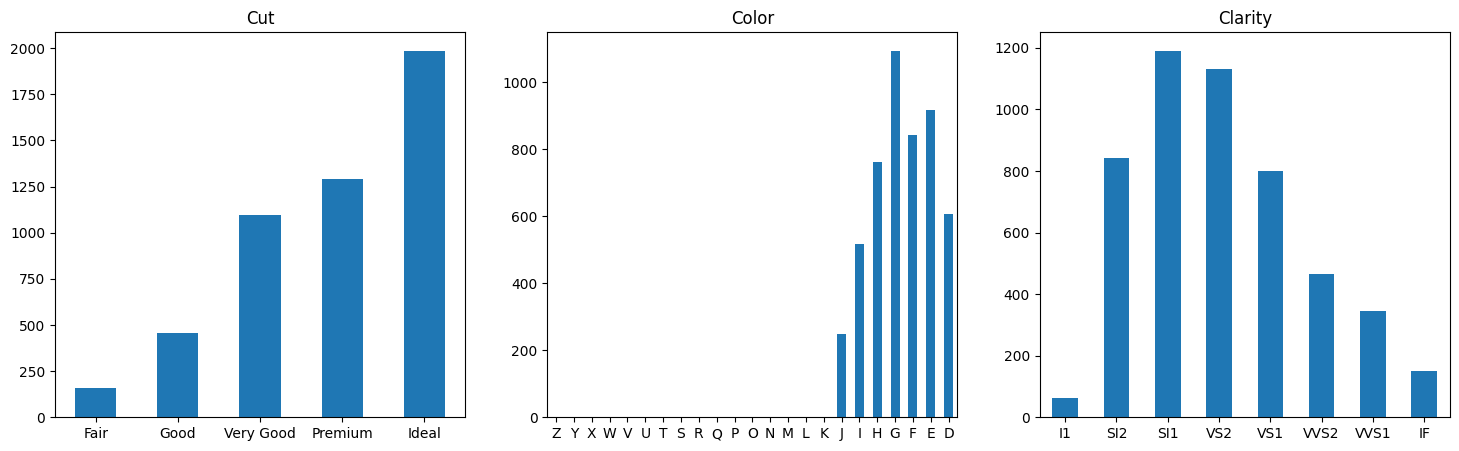

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

df['cut'].value_counts(sort=False).plot.bar(rot=0, ax=axes[0])
axes[0].set_title('Cut')
axes[0].set_xlabel('')

df['color'].value_counts(sort=False).plot.bar(rot=0, ax=axes[1])
axes[1].set_title('Color')
axes[1].set_xlabel('')

df['clarity'].value_counts(sort=False).plot.bar(rot=0, ax=axes[2])
axes[2].set_title('Clarity')
axes[2].set_xlabel('')

plt.show()

Then define mapping dictionaries to perform Ordinal Encoding of the categorical features.

In [15]:
color_grade_encoder = {grade: index for index, grade in enumerate(COLOR_GRADING_SCALE)}
cut_grade_encoder = {grade: index for index, grade in enumerate(CUT_GRADE_SCALE)}
clarity_encoder = {clarity: index for index, clarity in enumerate(CLARITY_SCALE)}

And create a new version of the dataset with the encoded values.

In [16]:
df_encoded = pd.DataFrame(df)

df_encoded['color'] = df['color'].map(color_grade_encoder)
df_encoded['cut'] = df['cut'].map(cut_grade_encoder)
df_encoded['clarity'] = df['clarity'].map(clarity_encoder)

df_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,4,18,1,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,4,18,2,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,3,17,2,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,4,20,2,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,2,20,3,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,4,18,5,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,3,19,5,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,4,16,5,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,3,20,3,62.9,58.0,802,4.31,4.27,2.70


We can now plot again the correlation matrix and see that our categorical features do not seem to highly influence the prices, or at least way less than the carat and the dimensions.

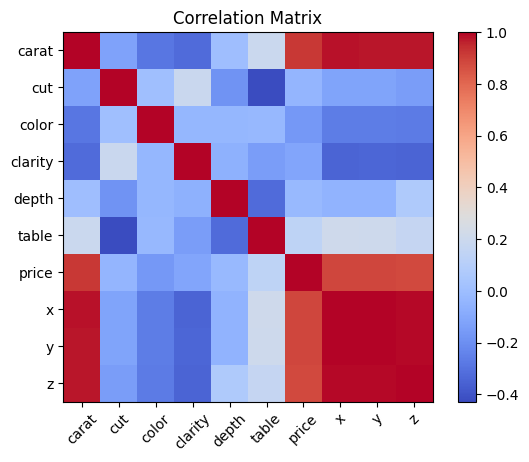

In [17]:
import matplotlib.pyplot as plt

corr_matrix = df_encoded.corr()

plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


Finally save the encoded dataset locally for model training.

In [18]:
df.to_csv('../datasets/diamonds/preprocessed/diamonds.csv', index=False)
df_encoded.to_csv('../datasets/diamonds/preprocessed/diamonds_encoded.csv', index=False)